Name: Ibrahim Al Hazwani

In [38]:
# importing all the library

import requests
import nltk
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup
from collections import Counter

In [39]:
# downloading ntlk library

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/ibrahim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ibrahim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
url = 'https://www.imdb.com/title/tt0068646/reviews?ref_=tt_ql_3'
path = '../Data/emotionWords.csv'

In [41]:
response = requests.get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
reviews = html_soup.findAll('div',{'class':"text show-more__control"})

In [42]:
with open(path) as f:
    emoticon = f.read()

In [43]:
review = reviews[0:10]

In [44]:
review

[<div class="text show-more__control">'The Godfather' is the pinnacle of flawless films! The first time I viewed 'The Godfather' I was in my early teens and it was the most astounding film I had ever seen, and has since then stood as my all-time favourite film. It is due to this that I have been looking forward to writing a review of this unforgettable classic. So let's start from the beginning. The film opens to four words, 'I believe in America', it's crazy to think that this simple line has become a resonant quote solely due to the impact it made on the entrance to the film's "threshold". This is just one of the many renowned quotes that litter the film, and believe me, there are a lot. After the first take we are then absorbed into the life of Vito Corleone, brilliantly portrayed by the Oscar- winning performance of Marlon Brando. Vito is a feared man, he is a criminal, he is a mafioso, but above all he is a respected family man, his three sons are depicted by three excellent actor

In [45]:
def token_stem_review(review):
    tokens_review = nltk.word_tokenize(review.getText())
    stop_words = nltk.corpus.stopwords.words('english')
    tokens_wo_stop = [tok for tok in tokens_review if tok not in stop_words]
    porter_review = nltk.stem.porter.PorterStemmer() 
    tokens_review_stemmed = [porter_review.stem(tok) for tok in tokens_wo_stop]
    return tokens_review_stemmed

In [48]:
def token_stem_emoticon(doc):
    #split_emoticon = doc.split()
    tokens_emoticon = nltk.word_tokenize(doc)
    porter_emoticon = nltk.stem.porter.PorterStemmer()
    tokens_emoticon_stemmed = [porter_emoticon.stem(tok) for tok in tokens_emoticon]
    return tokens_emoticon_stemmed

In [49]:
same = []
for i in range(len(review)):
    a = token_stem_review(review[i])
    b = token_stem_emoticon(emoticon)
    #print(a)
    for word in a:
        if word in b:
            same.append(word)
print(same)

['great', 'bad', 'like', 'bad', 'great', 'great', 'pretti', 'great', 'like', 'like', 'great', 'mean', 'good', 'like', 'great', 'like', 'rare', 'good', 'like', 'like', 'rare', 'like', 'good', 'great', 'great', 'like']


In [50]:
count = Counter(same)

In [31]:
count

Counter({'great': 8,
         'bad': 2,
         'like': 9,
         'pretti': 1,
         'mean': 1,
         'good': 3,
         'rare': 2})

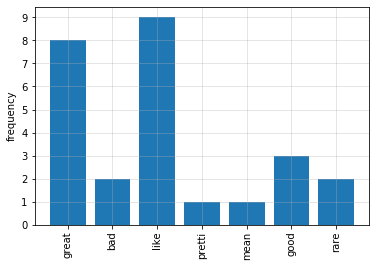

In [32]:
plt.bar(x = count.keys(), height=count.values())
plt.ylabel('frequency')
plt.xticks(rotation = 'vertical')
plt.yticks(np.arange(0, max(count.values())+1, 1))
plt.grid(alpha=0.4)
plt.show()